In [10]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
print(tips[:5])
print(len(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
244


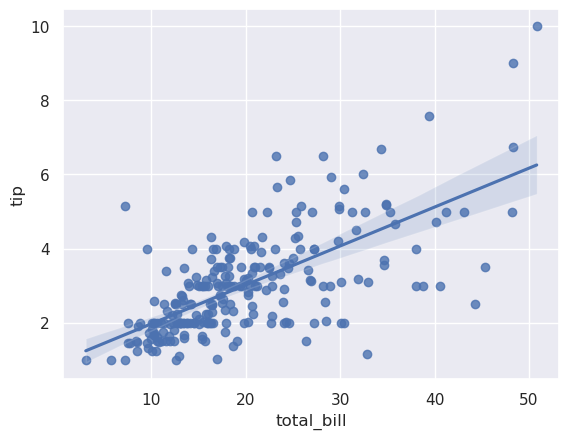

In [11]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

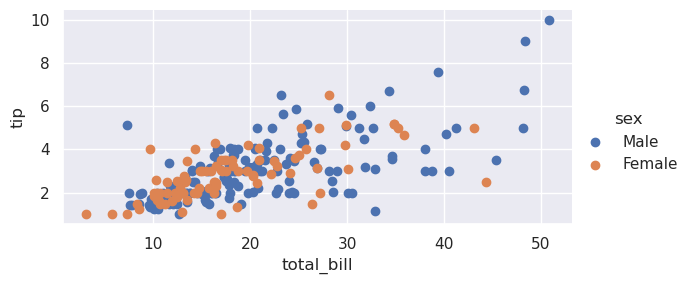

In [13]:
import matplotlib.pyplot as plt
#g = sns.FacetGrid(tips, hue="sex", size=6, aspect=2)
g = sns.FacetGrid(tips, hue="sex", aspect=2)
g.map(plt.scatter, "total_bill", "tip")
g.add_legend()

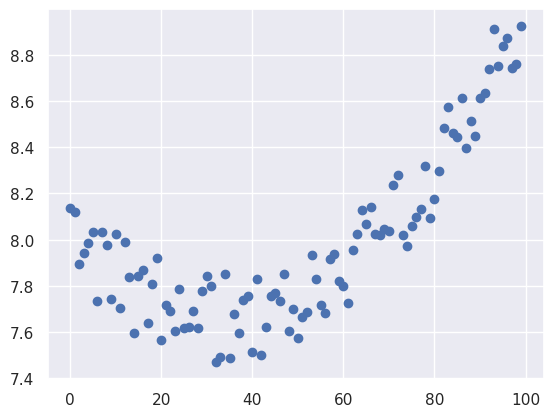

In [14]:
import random
import numpy as np
x = np.arange(0,1,0.01)
y = 3*x*x - 2*x + 8
#y = y + random.sample(np.arange(-0.2,0.2,0.4/len(y)), len(y))
y = y + random.sample(sorted(np.arange(-0.2,0.2,0.4/len(y))), len(y))
plt.plot(y, marker='o', linestyle='None')

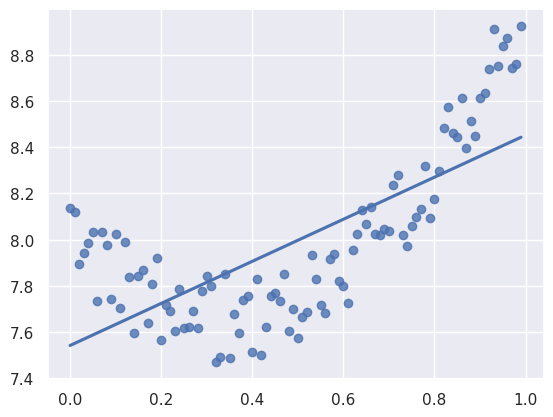

In [17]:
ax = sns.regplot(x=x, y=y, ci=None, truncate=True)

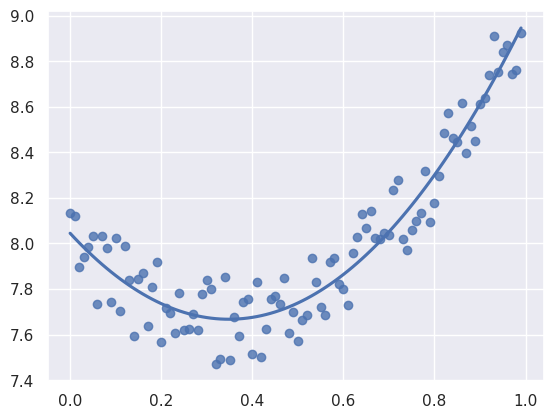

In [18]:
ax = sns.regplot(x=x, y=y, order=2, ci=None, truncate=True)

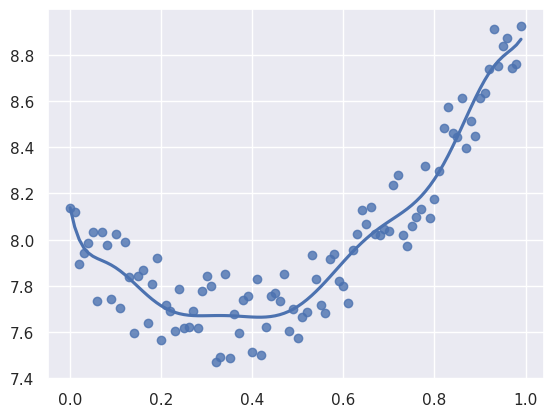

In [19]:
ax = sns.regplot(x=x, y=y, order=12, ci=None, truncate=True)

In [21]:
import tensorflow as tf
import pandas as pd
import seaborn as sns;
tips = sns.load_dataset("tips")
tips = tips.sample(frac=1.0)
trainsize = int(len(tips) * 0.8)
df_train = tips[:trainsize]
print(df_train[:5])

2024-04-02 17:23:24.903728: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


     total_bill   tip     sex smoker  day    time  size
113       23.95  2.55    Male     No  Sun  Dinner     2
179       34.63  3.55    Male    Yes  Sun  Dinner     2
182       45.35  3.50    Male    Yes  Sun  Dinner     3
216       28.15  3.00    Male    Yes  Sat  Dinner     5
66        16.45  2.47  Female     No  Sat  Dinner     2


In [22]:
# working with numpy arrays works
tf.logging.set_verbosity(tf.logging.INFO)
predictors = df_train.loc[:,['total_bill', 'size']].values # np.ndarray
targets = df_train.iloc[:,1].values
features = tf.contrib.learn.infer_real_valued_columns_from_input(predictors)
model = tf.contrib.learn.LinearRegressor(feature_columns=features)
model.fit(predictors, targets, steps=1000)

AttributeError: module 'tensorflow' has no attribute 'logging'

In [28]:
arr = [[x for x in np.append(np.zeros(9), 1.0)] for row in range(0,10)]
for row in arr:
   np.random.shuffle(row)
print(np.array(arr))

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [34]:
%bash
pip install scikit-image

  Running setup.py bdist_wheel for toolz: started
  Running setup.py bdist_wheel for toolz: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/b0/84/bf/7089262387e8ea60bdefb1fdb84d2ee99427f6d09c9c7ba37d
Successfully built toolz


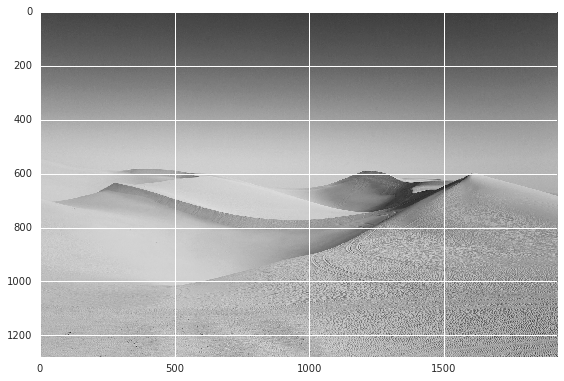

In [40]:
import skimage
import skimage.io
import skimage.filters
import os
from skimage.color import rgb2gray

desert = rgb2gray(skimage.io.imread('algodones-dunes-1654439_1920.jpg'))
skimage.io.use_plugin('matplotlib', 'imread')
skimage.io.imshow(desert)

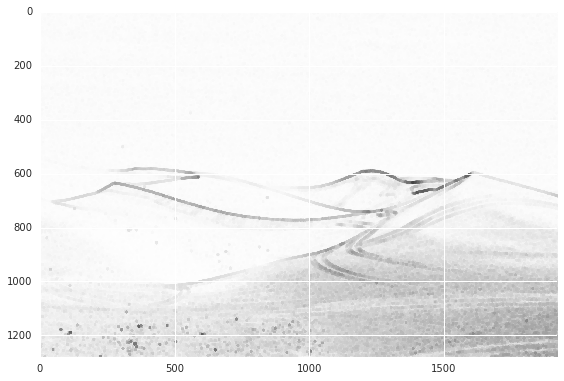

In [59]:
edges = np.abs(skimage.filters.sobel_h(desert))
from skimage.filters.rank import maximum
from skimage.morphology import disk
out = 255 - maximum(edges, disk(5))
skimage.io.imshow(out)

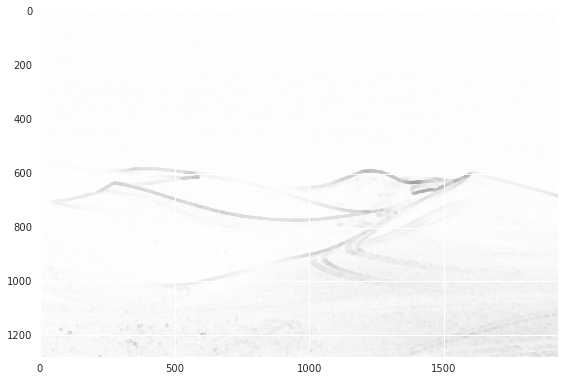

In [60]:
smooth = skimage.filters.rank.mean(desert, disk(2))
edges = np.abs(skimage.filters.sobel_h(smooth))
from skimage.filters.rank import maximum
from skimage.morphology import disk
out = 255 - maximum(edges, disk(5))
skimage.io.imshow(out)

<h3> Benchmarking early models </h3>

In [1]:
import datalab.bigquery as bq
import numpy as np
import pandas as pd


def create_query(phase, EVERY_N):
  """
  phase: 1=train 2=valid
  """
  base_query = """
SELECT
  DAYOFWEEK(pickup_datetime)*1.0 AS dayofweek,
  HOUR(pickup_datetime)*1.0 AS hourofday,
  pickup_longitude, pickup_latitude, 
  dropoff_longitude, dropoff_latitude,
  passenger_count*1.0 AS passenger_count,
  (tolls_amount + fare_amount) as fare_amount
FROM
  [nyc-tlc:yellow.trips]
WHERE
    trip_distance > 0
    AND fare_amount >= 2.5
    AND pickup_longitude > -78
    AND pickup_longitude < -70
    AND dropoff_longitude > -78
    AND dropoff_longitude < -70
    AND pickup_latitude > 37
    AND pickup_latitude < 45
    AND dropoff_latitude > 37
    AND dropoff_latitude < 45
    AND passenger_count > 0 
  """

  if EVERY_N == None:
    if phase < 2:
      # training
      query = "{0} AND ABS(HASH(pickup_datetime)) % 4 < 2".format(base_query)
    else:
      query = "{0} AND ABS(HASH(pickup_datetime)) % 4 == {1}".format(base_query, phase)
  else:
      query = "{0} AND ABS(HASH(pickup_datetime)) % {1} == {2}".format(base_query, EVERY_N, phase)
    
  return query

def distance_between(lat1, lon1, lat2, lon2):
  # haversine formula to compute distance "as the crow flies".  Taxis can't fly of course.
  dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) * np.sin(np.radians(lat2)) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(np.radians(lon2 - lon1)))) * 60 * 1.515 * 1.609344
  return dist

def estimate_distance(df):
  return distance_between(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

def compute_rmse(actual, predicted):
  return np.sqrt(np.mean((actual-predicted)**2))

def print_rmse(df, rate, name):
  print("{1} RMSE = {0}".format(compute_rmse(df['fare_amount'], rate*estimate_distance(df)), name))

query = create_query(2, 100000)
df_valid = bq.Query(query).to_dataframe()
print_rmse(df_valid, 2.56, 'Final Validation Set')

Final Validation Set RMSE = 8.02608564676


In [7]:
%%mlalpha train --cloud
package_uris:  gs://cloud-training-demos-ml/taxifare/source4b/taxifare.tar.gz
python_module: trainer.task
scale_tier: BASIC
region: us-central1
args:
  train_data_paths: gs://cloud-training-demos-ml/taxifare/taxi_preproc4a/features_train*
  eval_data_paths: gs://cloud-training-demos-ml/taxifare/taxi_preproc4a/features_eval*
  metadata_path: gs://cloud-training-demos-ml/taxifare/taxi_preproc4a/metadata.yaml
  output_path: gs://cloud-training-demos-ml/taxifare/taxi_trained4b/eval
  max_steps: 2500
  hidden_layer1_size: 147
  number_buckets: 19
  learning_rate: 0.047
  batch_size: 512

In [9]:
%mlalpha jobs --name trainer_task_161012_212122

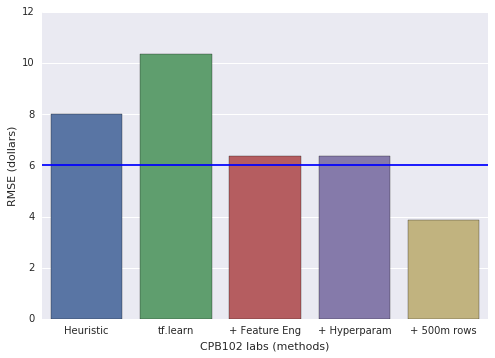

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'Lab' : pd.Series(['1a', '2c', '3a', '4a', '4b', '4c']),
              'Method' : pd.Series(['Heuristic', 'tf.learn', '+ Feature Eng', '+ Hyperparam', '+ 500m rows']),
              'RMSE': pd.Series([8.026, 10.344, 6.38, 6.28, 3.86]) })

ax = sns.barplot(data=df, x='Method', y='RMSE')
ax.set_ylabel('RMSE (dollars)')
ax.set_xlabel('CPB102 labs (methods)')
plt.plot(np.linspace(-20,120,1000), [5]*1000, 'b')